In [1]:
import pandas as pd
# Open classified videos csv
df = pd.read_csv('./data/classification_by_title_and_tags_2017.csv')
print(len(df))
df.head()

10000


Unnamed: 0 categories                channel_id  \
0      150576  Education  UCVJalJNQWimC2zWrIHR_bSQ   
1      182689  Education  UCUnFheTbVpASikm0YPb8pSw   
2      367795  Education  UCS3RXL1ICt42KV-EeXSt--A   
3      230790  Education  UCTvl_LGIijXntLQxpQd-IuQ   
4      176640  Education  UCUsg0kX7FPatpsmtRI1G6Aw   

                   crawl_date  \
0  2019-11-03 06:23:29.582519   
1  2019-11-20 00:12:09.749495   
2  2019-10-29 20:26:51.335763   
3  2019-11-10 10:12:42.895821   
4  2019-11-19 23:23:46.083533   

                                         description  dislike_count  \
0  An interview with billionaire entrepreneur and...            2.0   
1  John from http://www.growingyourgreens.com/ an...           35.0   
2  What does globetrot mean?\nA spoken definition...            0.0   
3  Here is a collection of educational videos rel...            6.0   
4  You can go to https://cardgames.io/triangles/ ...            2.0   

    display_id  duration  like_count  \
0  1ECOnSEKiSk      2331       132.0   
1  38m6OHI8EJ8      1999       433.0   
2  S9Za_8z24GU        35         0.0   
3  LLI2U3EO2TY       254       321.0   
4  QiUtYE0oFFk       195         3.0   

                                                tags  \
0  Investors Archive,money,education,investing,bu...   
1  cabbage moth,cabbage worm,cabbage moths,cabbag...   
2  globetrot,definition,meaning,English,Explanati...   
3  learning for success,how to study well,how to ...   
4  game,howto play,triangles,card,games,board,fun...   

                                               title upload_date  view_count  \
0    Jack Ma: Building Alibaba and its Future (2017)  2017-10-03      7205.0   
1  How to Get Rid of Cabbage Moths / Worms + More...  2017-12-29      8097.0   
2                          What does globetrot mean?  2017-11-24         4.0   
3              គន្លឹះ៦យ៉ាងដើម្បីក្លាយជាអ្នកមានជោគជ័យ  2017-04-23     17304.0   
4                 How To Play Triangles (Board Game)  2017-10-11       684.0   

   year  month  day                                               text  \
0  2017     10    3  Jack Ma: Building Alibaba and its Future (2017...   
1  2017     12   29  How to Get Rid of Cabbage Moths / Worms + More...   
2  2017     11   24  What does globetrot mean?globetrot,definition,...   
3  2017      4   23  គន្លឹះ៦យ៉ាងដើម្បីក្លាយជាអ្នកមានជោគជ័យlearning ...   
4  2017     10   11  How To Play Triangles (Board Game)game,howto p...   

   __index_level_0__  broad_category  broad_confidence  
0             150576  Cryptocurrency          0.096170  
1             182689     Environment          0.294774  
2             367795        Language          0.292360  
3             230790         History          0.206077  
4             176640     Environment          0.474845

In [2]:
# Open and clean time series
df_ts_r = pd.read_csv("./data/df_timeseries_en.tsv.gz", compression="infer", sep="\t")

missing_columns = df_ts_r.columns[df_ts_r.isnull().any()]
print('Columns with missing values: ', missing_columns.tolist())
missing_indices = df_ts_r[df_ts_r.isnull().any(axis=1)].index
print(len(missing_indices), 'rows wih missing values')

df_ts = df_ts_r.drop(index=missing_indices)
print('Length after dropping missing values:', len(df_ts_r))

df_ts['datetime'] = pd.to_datetime(df_ts['datetime'])
df_ts['month'] = df_ts['datetime'].dt.month
df_ts['year'] = df_ts['datetime'].dt.year
df_ts['day'] = df_ts['datetime'].dt.day
df_ts.head()

Columns with missing values:  ['category']
20584 rows wih missing values
Length after dropping missing values: 18872499


channel            category   datetime         views  \
0  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation 2017-07-03  2.024946e+05   
1  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation 2017-07-10  3.940857e+05   
2  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation 2017-07-17  8.353938e+05   
3  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation 2017-07-24  1.104577e+06   
4  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation 2017-07-31  1.284406e+06   

     delta_views         subs  delta_subs  videos  delta_videos  activity  \
0       0.000000   650.222222    0.000000       5             0         3   
1  191591.111111  1046.000000  395.777778       6             1         1   
2  441308.083333  1501.500000  455.500000       6             0         1   
3  269183.250000  1750.000000  248.500000       6             0         0   
4  179828.600000  2008.300000  258.300000       6             0         0   

   month  year  day  
0      7  2017    3  
1      7  2017   10  
2      7  2017   17  
3      7  2017   24  
4      7  2017   31

In [3]:
from utils import create_channels_cat
channels_cat = create_channels_cat(df)
channels_cat

channel_id                                  categories  \
0    UCQe7WMyQr5Z3XQs8sIQo2Pw          [Edutainment, Literature, History]   
1    UCQeHcVNo6CPWpgJaqEObrqA  [Literature, Environment, Health, History]   
2    UCQelqb2QFu9EJAZMGN8Rmcg      [Literature, Edutainment, Environment]   
3    UCQf3jCaIVZudZ-p5WC1Fc_w                                [Literature]   
4    UCQg2AzkYEueS5giD84wxLdg                      [Language, Literature]   
..                        ...                                         ...   
818  UCxDs6k9z7Gsox02vfLEHTDg                    [Edutainment, Test Prep]   
819  UCxEX_RL_Fa9MUSmrYzQz1mg                               [Edutainment]   
820  UCxFcEYP2-vd2TfMS2b3noDQ   [History, Literature, Music, Edutainment]   
821  UCxFmgRSaH1aIKkli8Uz2Vtw                                       [Art]   
822  UCxHTJnQ8yqA3rjDwLemtAKA          [Edutainment, Cooking, Literature]   

                                               weights  
0                                      [0.4, 0.4, 0.2]  
1    [0.6666666666666666, 0.16666666666666666, 0.08...  
2                                    [0.5, 0.25, 0.25]  
3                                                [1.0]  
4            [0.8571428571428571, 0.14285714285714285]  
..                                                 ...  
818                                         [0.5, 0.5]  
819                                              [1.0]  
820  [0.45454545454545453, 0.4090909090909091, 0.09...  
821                                              [1.0]  
822                                    [0.6, 0.2, 0.2]  

[823 rows x 3 columns]

c:\Users\fpili\Desktop\ada-2024-project-sickada\utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["category_weight"] = filtered_df.apply(
c:\Users\fpili\Desktop\ada-2024-project-sickada\utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["category_weight"] = filtered_df.apply(


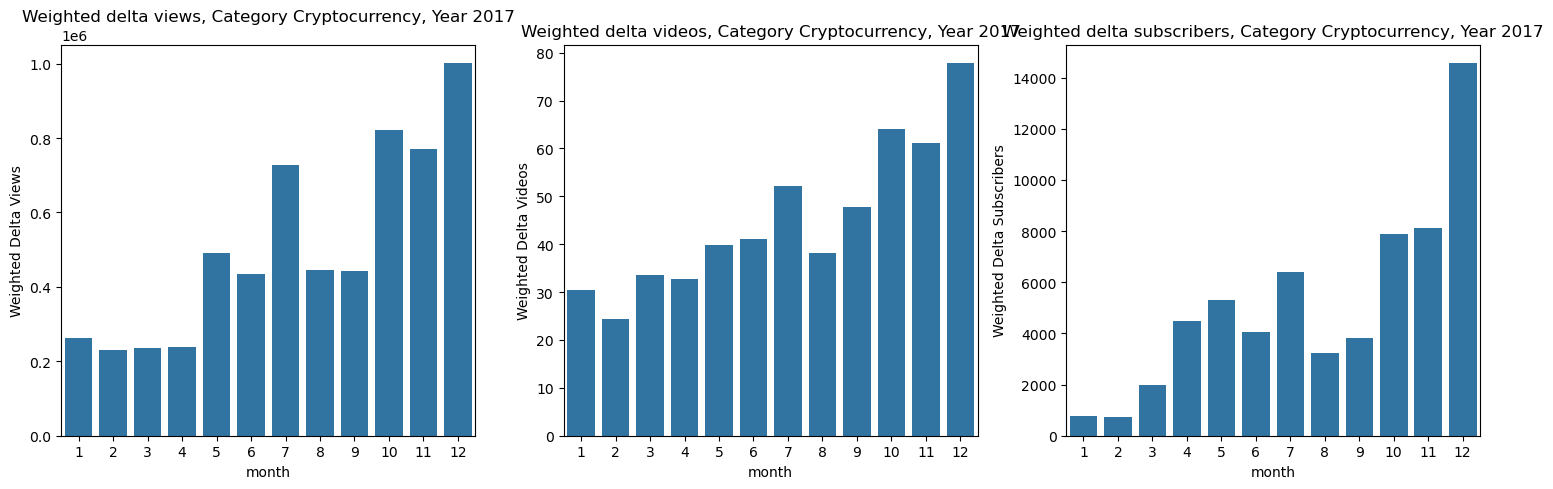

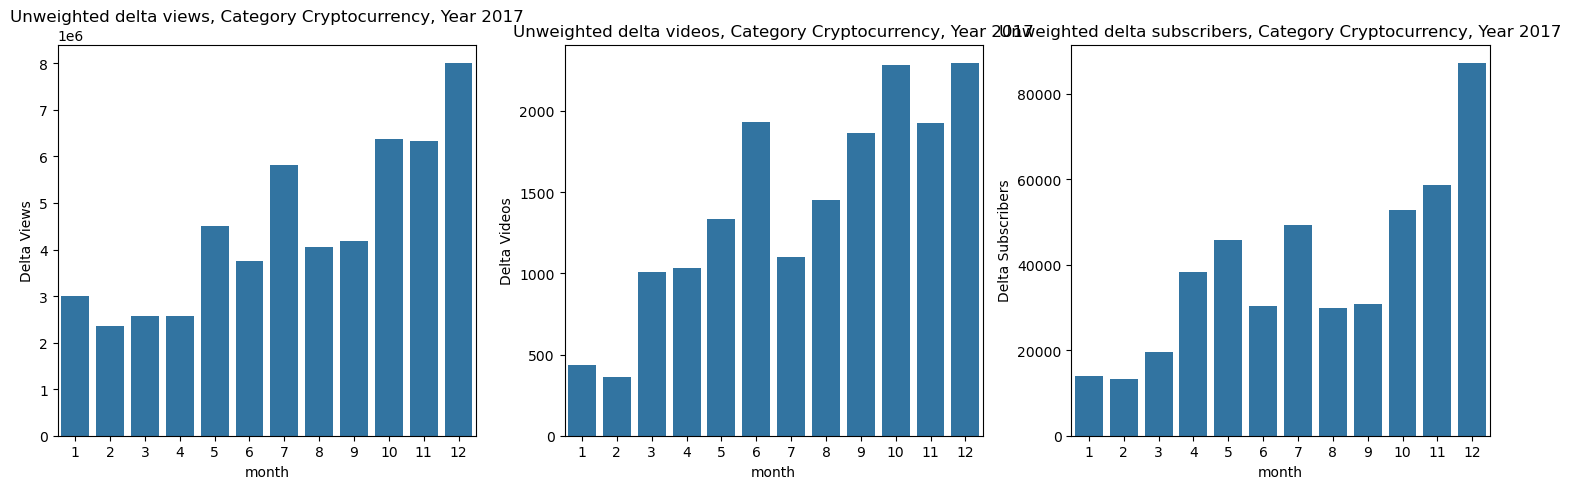

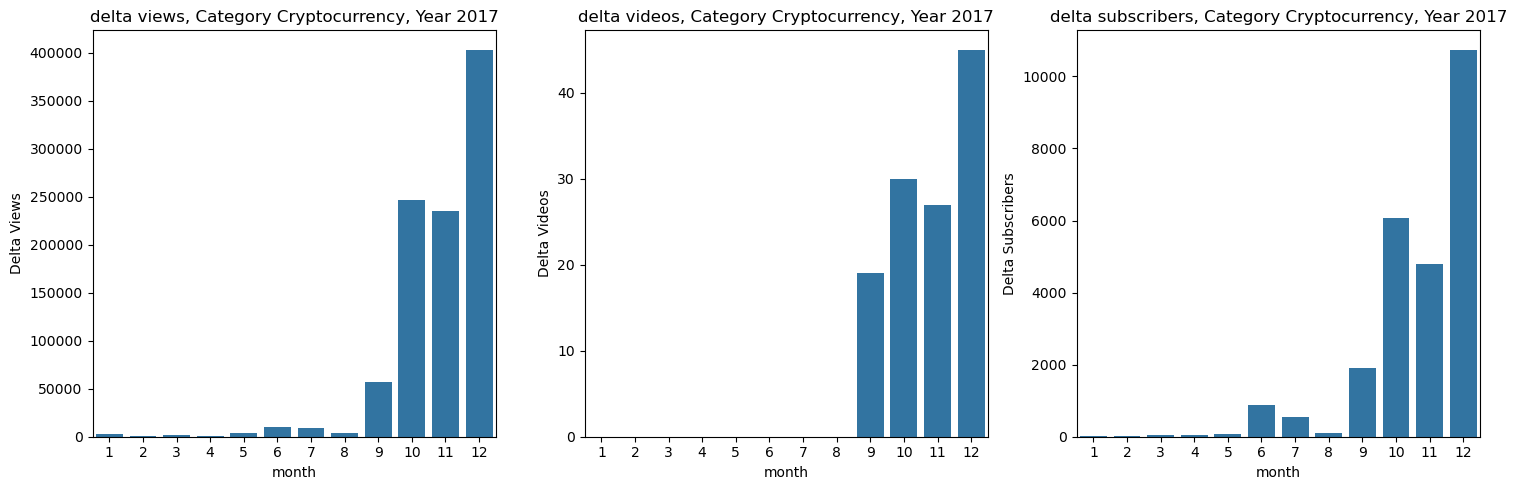

In [4]:
from utils import plot_weighted_timeseries, plot_unweighted_timeseries, plot_timeseries_single_category

plot_weighted_timeseries(df_ts, channels_cat, category='Cryptocurrency', year=2017)
plot_unweighted_timeseries(df_ts, channels_cat, category='Cryptocurrency', year=2017)

from utils import create_channel_cat_single
channel_cat_single = create_channel_cat_single(df)

plot_timeseries_single_category(df_ts, channel_cat_single, category='Cryptocurrency', year=2017)